In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_fscore_support 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn import grid_search, svm
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

df = pd.read_csv('CKD_full.csv')
df.head()

,ID,Race,Gender,Age,Creatinine,Glucose,DBP,SBP,HGB,LDL,Class
0,1,Unknown,Male,70,1.24,6.46,83.17,139.61,13.26,143.59,ckd
1,2,White,Female,71,1.84,9.24,80.46,150.23,13.66,82.42,notckd
2,3,White,Female,57,2.17,6.47,89.22,140.21,15.70,75.28,ckd
3,4,White,Male,74,1.00,6.52,74.86,139.59,13.20,98.25,notckd
4,5,White,Female,50,1.15,9.72,97.39,160.67,12.66,65.91,ckd


In [113]:
df['Class'] = df['Class'].replace(to_replace={'ckd':1.0,'notckd':0.0})

In [114]:
df[['Gender']] = df[['Gender']].replace(to_replace={'Male':1,'Female':0})

In [115]:
df[['Race']] = df[['Race']].replace(to_replace={'White':1,'Black':2,'Hispanic':3,'Asian':4,'Unknown':np.nan})

In [116]:
df.drop('ID',axis=1,inplace=True)
df.head()

,Race,Gender,Age,Creatinine,Glucose,DBP,SBP,HGB,LDL,Class
0,NaN,1,70,1.24,6.46,83.17,139.61,13.26,143.59,1.0
1,1.0,0,71,1.84,9.24,80.46,150.23,13.66,82.42,0.0
2,1.0,0,57,2.17,6.47,89.22,140.21,15.70,75.28,1.0
3,1.0,1,74,1.00,6.52,74.86,139.59,13.20,98.25,0.0
4,1.0,0,50,1.15,9.72,97.39,160.67,12.66,65.91,1.0


In [117]:
df = df.dropna(axis=0)
df['Class'].value_counts()

0.0    184
1.0     90
Name: Class, dtype: int64

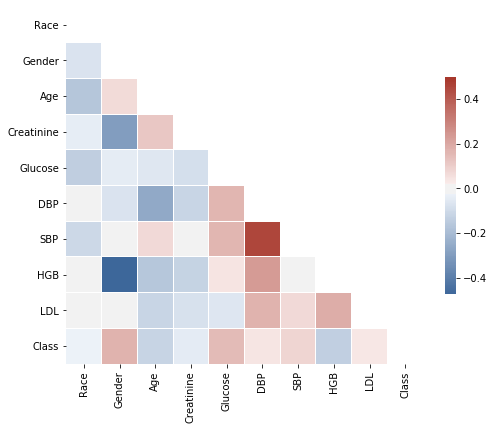

In [152]:
corr_df = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heat_plot = sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5})

#plt.title('Correlations between different predictors')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
fig = heat_plot.get_figure()
fig.savefig('corr_df.png') 

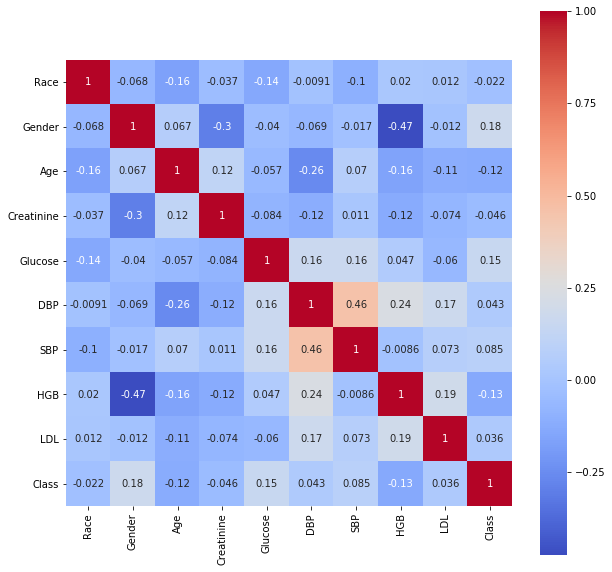

In [153]:
plt.figure(figsize = (10,10))
heat_plot2 = sns.heatmap(df.corr(), square = True, annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!
fig = heat_plot2.get_figure()
fig.savefig('corr_df2.png') 

In [119]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(C=.1, degree=1, kernel='poly', probability=True),
    NuSVC(nu=.1, degree=1, kernel='poly', probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    LogisticRegression()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        print("Accuracy: {:.4%}".format(acc))
#         print("accuracy_score: \n",accuracy_score(y_test, train_predictions))
        print("precision_score: \n",precision_score(y_test, train_predictions))
        print("f1_score: \n",f1_score(y_test, train_predictions))
#         print("classification_report: \n",classification_report(y_test, train_predictions))
        print("confusion_matrix: \n",confusion_matrix(y_test, train_predictions))
        print("log_loss: \n",log_loss(y_test, train_predictions))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_test, train_predictions)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 65.4545%
precision_score: 
 0.7142857142857143
f1_score: 
 0.3448275862068965
confusion_matrix: 
 [[31  2]
 [17  5]]
log_loss: 
 11.93160637633024
SVC
****Results****
Accuracy: 60.0000%
precision_score: 
 0.0
f1_score: 
 0.0
confusion_matrix: 
 [[33  0]
 [22  0]]
log_loss: 
 13.81551055796427


C:\Users\MED\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\MED\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\MED\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\MED\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' t

NuSVC
****Results****
Accuracy: 50.9091%
precision_score: 
 0.391304347826087
f1_score: 
 0.4
confusion_matrix: 
 [[19 14]
 [13  9]]
log_loss: 
 16.95560285502929
DecisionTreeClassifier
****Results****
Accuracy: 58.1818%
precision_score: 
 0.47368421052631576
f1_score: 
 0.43902439024390244
confusion_matrix: 
 [[23 10]
 [13  9]]
log_loss: 
 14.443633691949955
RandomForestClassifier
****Results****
Accuracy: 65.4545%
precision_score: 
 0.7142857142857143
f1_score: 
 0.3448275862068965
confusion_matrix: 
 [[31  2]
 [17  5]]
log_loss: 
 11.931606376330242
AdaBoostClassifier
****Results****
Accuracy: 61.8182%
precision_score: 
 0.5454545454545454
f1_score: 
 0.3636363636363636
confusion_matrix: 
 [[28  5]
 [16  6]]
log_loss: 
 13.187605496005004
GradientBoostingClassifier
****Results****
Accuracy: 70.9091%
precision_score: 
 0.6875
f1_score: 
 0.5789473684210527
confusion_matrix: 
 [[28  5]
 [11 11]]
log_loss: 
 10.047716732831306
GaussianNB
****Results****
Accuracy: 74.5455%
precision_sco

C:\Users\MED\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MED\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


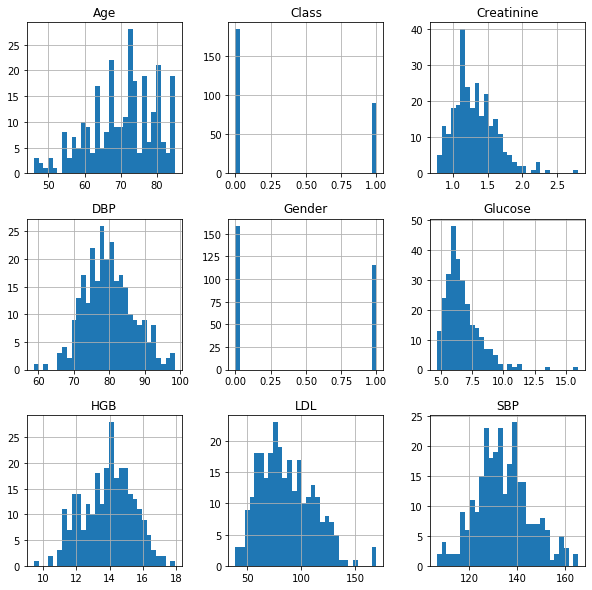

In [139]:
import pylab as pl
df.drop('Race' ,axis=1).hist(bins=30, figsize=(10,10))
#pl.suptitle("Histogram for each numeric input variable")
plt.savefig('df_hist')
plt.show()

In [145]:
df.describe()


,Race,Gender,Age,Creatinine,Glucose,DBP,SBP,HGB,LDL,Class
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,1.324818,0.419708,70.343066,1.315949,6.703139,79.778066,134.010438,13.905730,86.696277,0.328467
std,0.803133,0.494414,9.072309,0.306628,1.435899,6.921403,11.203195,1.528797,24.938921,0.470515
min,1.000000,0.000000,46.000000,0.770000,4.660000,58.740000,106.620000,9.440000,39.290000,0.000000
25%,1.000000,0.000000,64.000000,1.110000,5.792500,74.900000,126.807500,12.745000,67.525000,0.000000
50%,1.000000,0.000000,71.500000,1.270000,6.385000,79.135000,132.985000,14.095000,82.980000,0.000000
75%,1.000000,1.000000,77.000000,1.500000,7.297500,84.025000,140.372500,14.967500,104.382500,1.000000
max,4.000000,1.000000,85.000000,2.800000,15.990000,98.450000,165.200000,17.950000,169.860000,1.000000
